# Top Universities of the world
### 목적
- 전세계의 대학 100순위 데이터를 가지고 어느나라의 대학이 가장 많은지 시각화
### 과정
- 1. 데이터 수집 : 순위 제공 웹사이트에서 웹 크롤링
- 2. 데이터 전처리 : pandas를 통해 웹사이트의 데이터를 표로 가져오기
- 3. 데이터 분석 : 가져온 데이터를 시각화하여 100위안에 속한 대학이 어느 나라 소속인지 시각화하기

In [1]:
# 전 과정에 필요한 파이썬 모듈 한번에 불러오기

In [2]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

# 세계 100순위 대학을 소개하는 홈페이지에 접속하여 html태그  얻어오기
- 홈페이지 : https://www.topuniversities.com/student-info/choosing-university/worlds-top-100-universities
- occurred error >> http error 403: forbidden
    - request로 url을 가져왔으며 headers를 붙여주고, BeautifulSoup로 내용을 decode해서 가져옴 

In [3]:
req = Request('https://www.topuniversities.com/student-info/choosing-university/worlds-top-100-universities', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage.decode('utf-8'), "html.parser")
soup

<!DOCTYPE html>

<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:schema="http://schema.org/" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:video="http://ogp.me/ns/video#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<link href="/opensearch.xml" rel="search" title="TopUniversities" type="application/opensearchdescription+xml"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="text/html; charset=utf-8" http-equiv="Con

### 가져온 태그에서 find_all 함수를 사용해 div의 para태그 가져오기
- ![image](https://user-images.githubusercontent.com/68576770/102195638-2e0cb000-3f02-11eb-90b4-d732c5d3d273.png)
- Rank, University, Location에 해당하는 html 태그 부분은 
- ![image](https://user-images.githubusercontent.com/68576770/102195458-f69e0380-3f01-11eb-9da2-aaa18c7586a9.png)
- 모두 div class = "para"에 속해있다.
- 따라서 필요한 부분만 지정하여  가져온다.

In [4]:
tmp_url = soup.find_all('div','para')

tmp_url

[<div class="para"><strong>Rank</strong>
 </div>,
 <div class="para"><strong>University</strong>
 </div>,
 <div class="para"><strong>Location</strong>
 </div>,
 <div class="para">  1 
 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/massachusetts-institute-technology-mit">Massachusetts Institute of Technology (MIT)</a>
 </div>,
 <div class="para"><a href="https://www.topuniversities.com/where-to-study/north-america/united-states/guide">United States</a>
 </div>,
 <div class="para">  2 
 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/stanford-university">Stanford University</a>
 </div>,
 <div class="para">United States
 </div>,
 <div class="para">  3 
 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/harvard-university">Harvard University</a>
 </div>,
 <div class="para">United States
 </div>,
 <div class="para">  4 
 </div>,
 <div class="para"><a href="https://www.topuniversities.com/unive

- 가져온 tmp_url을 보면 Rank, University, Location이 차례로 번갈아 나온다.
### University에 저장된 url 가져오기
- url을 먼저 저장하기 위해 tmp_url태그에서 'a'태그가 있는 라인을 url_add에 저장
    - 중간에 몇 개가 location에도 url이 껴있어서 university 행에 있는 url만 가져오기 위해 
    - url이 연속으로 나오지 않을 때만 url_add에 append해주었다.

In [5]:
tmp_url = soup.find_all('div','para')
url_add = []
sum = 0
ind = 1
for i in range(3, len(tmp_url)):
    if i - sum != 2 and i - sum != 1 and tmp_url[i].find('a'):
        sum = i
        url_add.append(tmp_url[i].find('a')['href'])
        print(ind, i+1, tmp_url[i].find('a')['href'])
        ind += 1


1 5 https://www.topuniversities.com/universities/massachusetts-institute-technology-mit
2 8 https://www.topuniversities.com/universities/stanford-university
3 11 https://www.topuniversities.com/universities/harvard-university
4 14 https://www.topuniversities.com/universities/california-institute-technology-caltech
5 17 https://www.topuniversities.com/universities/university-oxford
6 20 https://www.topuniversities.com/universities/eth-zurich-swiss-federal-institute-technology
7 25 https://www.topuniversities.com/universities/university-cambridge
8 28 https://www.topuniversities.com/universities/imperial-college-london
9 31 https://www.topuniversities.com/universities/university-chicago
10 34 https://www.topuniversities.com/universities/ucl
11 37 https://www.topuniversities.com/universities/national-university-singapore-nus
12 40 https://www.topuniversities.com/universities/princeton-university
13 43 https://www.topuniversities.com/universities/nanyang-technological-university-singapore-

- 마찬가지로 tmp_one에서 Rank, University, Location을 각 리스트로 만들어 저장할 것이다.
- 그 전에 중간에 쓰레기 값이 몇 개가 껴있어서 tmp_one에서 get_text로 가져올 수 있는 것을 다시 리스트로 만들어서 사용할 것이다.

In [6]:
tmp_one = soup.find_all('div','para')
new_list=[]
for i in range(3,len(tmp_one)):
    if tmp_one[i].get_text(strip=True):
        print(tmp_one[i].get_text())
        new_list.append(tmp_one[i].get_text())
        print(i)


  1 

3
Massachusetts Institute of Technology (MIT)

4
United States

5
  2 

6
Stanford University

7
United States

8
  3 

9
Harvard University

10
United States

11
  4 

12
California Institute of Technology (Caltech)

13
United States

14
  5 

15
University of Oxford

16
United Kingdom

17
  6 

18
ETH Zurich (Swiss Federal Institute of Technology)
 

19
Switzerland
 

21
  7 

23
University of Cambridge

24
United Kingdom

25
  8 

26
Imperial College London

27
United Kingdom

28
  9 

29
University of Chicago

30
United States

31
  10 

32
UCL (University College London)

33
United Kingdom

34
  11 

35
National University of Singapore (NUS)

36
Singapore

37
  12 

38
Princeton University

39
United States

40
  13 

41
Nanyang Technological University, Singapore (NTU)

42
Singapore

43
  14 

44
Ecole Polytechnique Fédérale de Lausanne (EPFL)

45
Switzerland

46
  15 

47
Tsinghua University

48
China

49
  16 

50
University of Pennsylvania

51
United States

52
  18 

53

In [7]:
# Rank, University, Location를 담을 각 리스트를 rank, university, location으로 선언 후
# Rank에는 \xa0 혹은 \xa0\n 혹은 =\n가 껴있기 때문에 나누어서 rank 숫자만 tmp_rank에 append
# University와 Location에는 \n가 껴있기 때문에 나누어서 해당 문자만 tmp_univ와 tmp_loc에 append

In [8]:
rank = []
university = []
location = []

for i in range(len(new_list)):
    if i % 3 == 0:
        tmp_rank = re.split(('\xa0|\xa0\n|=\n'), new_list[i])
        if tmp_rank:
            rank.append(tmp_rank[1])
        tmp_univ = re.split(('\n'), new_list[i+1])
        if tmp_univ:
            university.append(tmp_univ[0])
        tmp_loc = re.split(('\n'), new_list[i+2])
        if tmp_loc:
            location.append(tmp_loc[0])
    


In [9]:
# 새로 list에 저장한 항목들이 100개씩 잘 들어왔는지 길이로 확인한다.

In [10]:
len(rank), len(university), len(location), len(url_add)

(100, 100, 100, 100)

In [11]:
# 위에서 만든 리스트들을 새로운 데이터 형식으로 저장한다.
# pandas 모듈을 불러와서 Dataframe으로 만들고 잘 가져왔는지 확인한다.

In [12]:
import pandas as pd

data = {'Rank':rank, 'University':university, 'Location':location, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,University,Location,URL
0,1,Massachusetts Institute of Technology (MIT),United States,https://www.topuniversities.com/universities/m...
1,2,Stanford University,United States,https://www.topuniversities.com/universities/s...
2,3,Harvard University,United States,https://www.topuniversities.com/universities/h...
3,4,California Institute of Technology (Caltech),United States,https://www.topuniversities.com/universities/c...
4,5,University of Oxford,United Kingdom,https://www.topuniversities.com/universities/u...


In [13]:
# 만든 dataframe 형식을 엑셀 파일로 저장한다.(날릴 위험이 있기 때문에)

In [14]:
df.to_csv('TopUniversity.csv', sep=',', encoding='UTF-8')

In [15]:
# URL항목의 첫번째 요소를 통해 url형식이 맞는지 확인한다.

In [16]:
df['URL'][0]

'https://www.topuniversities.com/universities/massachusetts-institute-technology-mit'

In [17]:
# URL항목의 첫번째 요소를 통해 각 대학에 연결된 url을 아까와 마찬가지로 BeautifulSoup을 통해 html태그를 가져온다.

In [18]:
req = Request(df['URL'][0], headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage.decode('utf-8'), "html.parser")
soup

<!DOCTYPE html>

<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:schema="http://schema.org/" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:video="http://ogp.me/ns/video#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#">
<head profile="http://www.w3.org/1999/xhtml/vocab">
<link href="/opensearch.xml" rel="search" title="TopUniversities" type="application/opensearchdescription+xml"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="text/html; charset=utf-8" http-equiv="Con

- ![image](https://user-images.githubusercontent.com/68576770/102199728-4b904880-3f07-11eb-97b9-1cd0ec3f7419.png)
- 대학교의 더 자세한 주소를 가져온다.
- ![image](https://user-images.githubusercontent.com/68576770/102199799-619e0900-3f07-11eb-8e72-07fe1c3d9322.png)
- 해당 html태그는 div class="location"이다.

In [19]:
# test_url을 가져오면 주소 뒤에 " ," 하고 원하지 않는 정보도 나와서 split으로 원하는 정보만 가져온다.

In [20]:
test_url = soup.find('div','location').get_text()
print(test_url)
test_url.split(',')[0]



77 Massachusetts Avenue Cambridge, United States View map 


'\n77 Massachusetts Avenue Cambridge'

In [21]:
# 이제는 100개 대학의 모든 url에 접속해서 location을 가져온다.
# 중간에 몇 대학에 대한 location 정보가 홈페이지에 없기 때문에 
# location이 없으면 "no info"값을 넣어줘서 불필요한 get_text의 수행이 발생하지 않도록 한다.
# 그 외에 location 정보들은 get_text로 가져온 후 "," 전까지의 데이터를 문자열로 가져온다.
# 100개의 url에 접속하여 가져오는 일은 시간이 은근히 걸리기 때문에
# tqdm 모듈을 이용해 하단 바에 진행률을 나타내었다.

In [22]:
address = []

for n in tqdm_notebook(df.index):
    req = Request(df['URL'][n], headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage.decode('utf-8'), "html.parser")
    soup
    
    test_url = soup.find('div','location')
    if test_url is None:
        address.append("no info")
    if test_url:
        test_url = soup.find('div','location').get_text(strip=True)
        address.append("".join(test_url.split(',')[:-1]))
    

<ipython-input-22-92c706654cd4>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(df.index):


In [23]:
# address 리스트도 100개를 잘 가져왔기 때문에 dataframe에 'Address' 이름으로 추가해준다.
# dataframe이 잘 완성되었는지 확인한다.

In [24]:
df['Address'] = address
df = df.loc[:, ['Rank', 'University', 'Location', 'URL', 'Address']]
#df.set_index('Rank', inplace=True)
df.head()

,Rank,University,Location,URL,Address
0,1,Massachusetts Institute of Technology (MIT),United States,https://www.topuniversities.com/universities/m...,77 Massachusetts Avenue Cambridge
1,2,Stanford University,United States,https://www.topuniversities.com/universities/s...,450 Serra Mall Stanford
2,3,Harvard University,United States,https://www.topuniversities.com/universities/h...,1350 Massachusetts Avenue Cambridge
3,4,California Institute of Technology (Caltech),United States,https://www.topuniversities.com/universities/c...,1200 East California Boulevard Pasadena
4,5,University of Oxford,United Kingdom,https://www.topuniversities.com/universities/u...,Wellington Square Oxford


In [25]:
#  address까지 추가해서 만든 dataframe 형식을 엑셀 파일로 저장한다.(날릴 위험이 있기 때문에)

In [26]:
df.to_csv('TopUniversity2.csv', sep=',', encoding='UTF-8')

In [27]:
# 데이터를 시각화 하기 위한 모듈을 import 한다.

In [28]:
from wordcloud import WordCloud, STOPWORDS

In [29]:
# 나라별 랭킹에 든 횟수를 셀 것이기 때문에 dataframe의 'Location'을 가져와 value_counts로 센다.
# 잘 카운팅 되었는지 확인한다.

In [30]:
wc = df['Location'].value_counts()
print(wc)

United States     27
United Kingdom    18
Australia          7
South Korea        6
China              6
Japan              5
Hong Kong          5
Germany            3
Switzerland        3
France             3
Canada             3
Singapore          2
Sweden             2
Netherlands        2
Malaysia           1
Taiwan             1
Argentina          1
Russia             1
New Zealand        1
Mexico             1
Belgium            1
Denmark            1
Name: Location, dtype: int64


In [31]:
# 내림차순으로 정렬하여 제목을 붙혀 바의 형태로 2차원 좌표계에 표현한다.

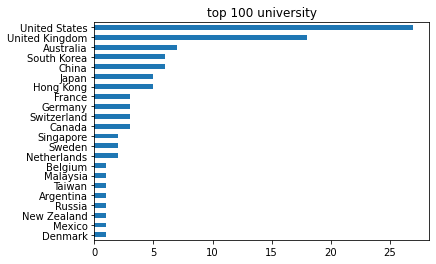

In [32]:
wc.sort_values().plot(kind='barh', title = 'top 100 university')
plt.show()

- Top 100 Universities를 좌표계에 표현하여 내림차순으로 한눈에 확인하였다.
- 100위 안에 속한 대학이 가장 많이 소속된 나라는 미국, 영국, 호주, 중국, 한국 그리고 그 외에 여러나라가 순서대로 있음을 확인할 수 있었다.
- 한국과 중국은 6개로 동일한 대학이 속해있지만 알파벳순으로 내림차순 되어있기 때문에 그래프 상으로는 아래에 있다.
- 진행 후 소감
    - 데이터 분석을 어떤 데이터로 할지부터 여러번 바꾸며 크롤링도 해가면서 진행했는데, 계속 바꾸다 보니 한 데이터세트를 깊게 분석하지 못했다.
    - 크롤링도 처음이고 파이썬으로 데이터 분석하는 것도 본 과제를 통해 생소하지만 경험해보아서 의미있었다.
    - 구글맵으로 지도에 100순위 대학 나라를 표기해보고 싶었지만 googlemap 키에 문제가 있어 진행하지 못한게 아쉽다.